In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Use the data to perform EDA (Exploratory data analysis)
* Then build a predictive model to predict the churn (Exit)

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df1 = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
df1.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


<Axes: ylabel='Frequency'>

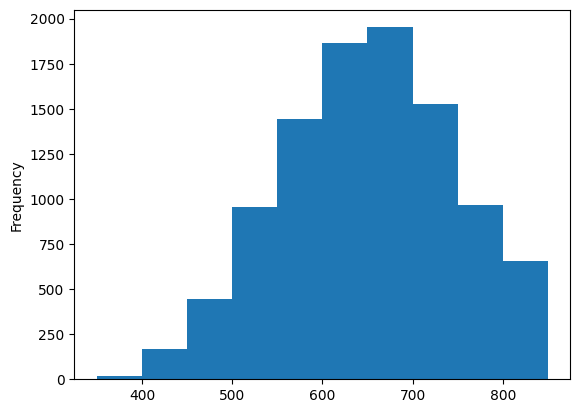

In [ ]:
df1['CreditScore'].plot.hist()

<Axes: >

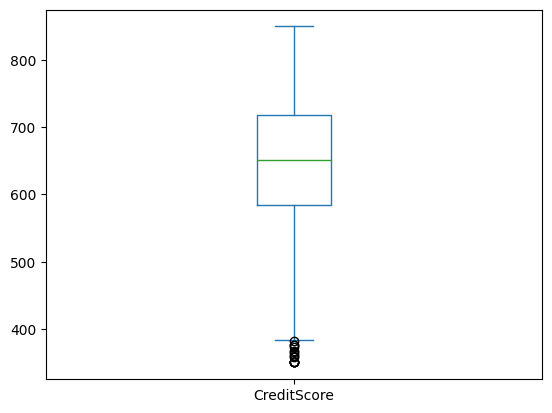

In [ ]:
df1['CreditScore'].plot.box()

In [ ]:
df1['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


<Axes: xlabel='Geography'>

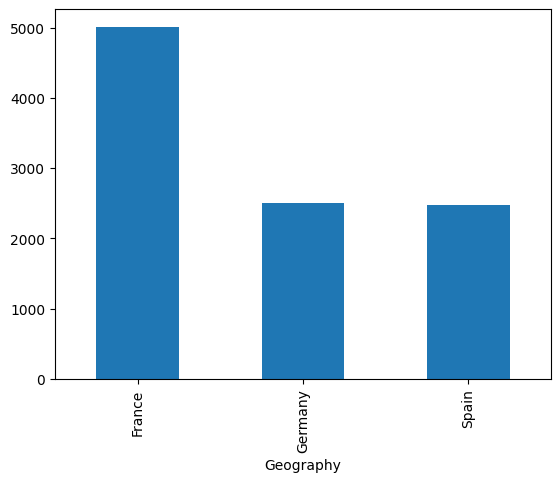

In [ ]:
df1['Geography'].value_counts().plot.bar()

<Axes: xlabel='Gender'>

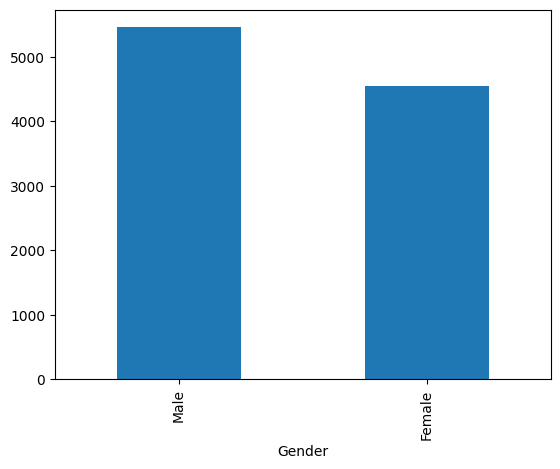

In [ ]:
df1['Gender'].value_counts().plot.bar()

In [ ]:
df1['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited'>

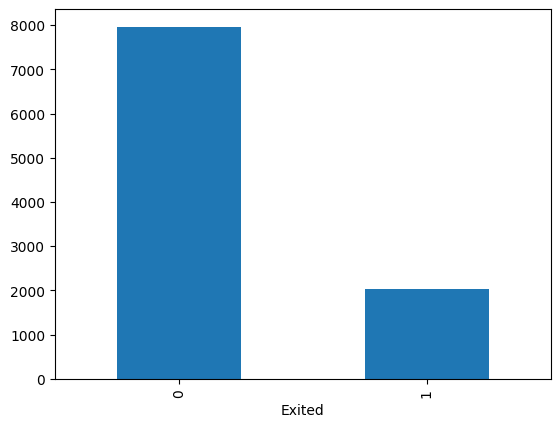

In [ ]:
df1['Exited'].value_counts().plot.bar()

In [ ]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


<Axes: ylabel='Frequency'>

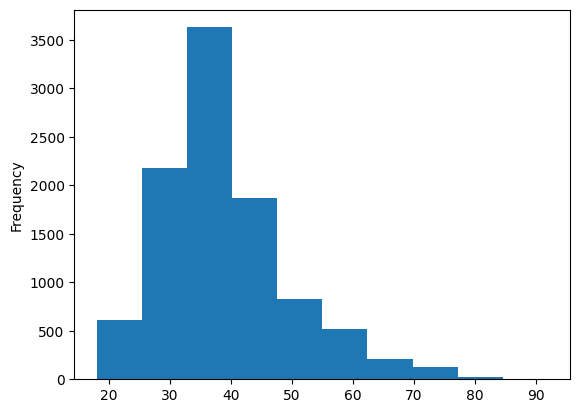

In [ ]:
df1['Age'].plot.hist()

<Axes: >

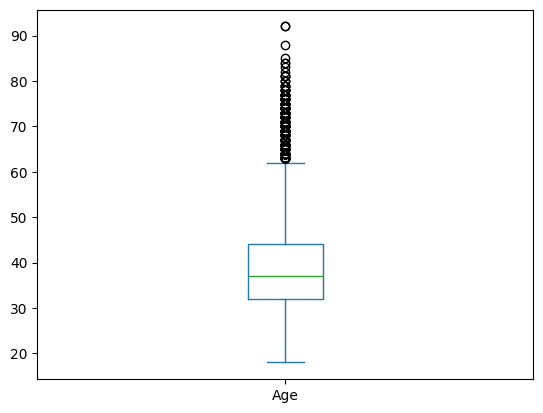

In [ ]:
df1['Age'].plot.box()

In [ ]:
#%ge of data with age outliers
q1 = df1['Age'].quantile(0.25)
q3 = df1['Age'].quantile(0.75)

iqr = q3 - q1
uf = q3 + 1.5 * iqr
lf = q1 - 1.5 * iqr

print("%ge of data as outliers")
print((((df1['Age'] > uf) | (df1['Age'] < lf)).sum()/10000)*100)

%ge of data as outliers
3.5900000000000003


In [ ]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df1['Tenure'].nunique()

11

In [ ]:
df1['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


<Axes: ylabel='Frequency'>

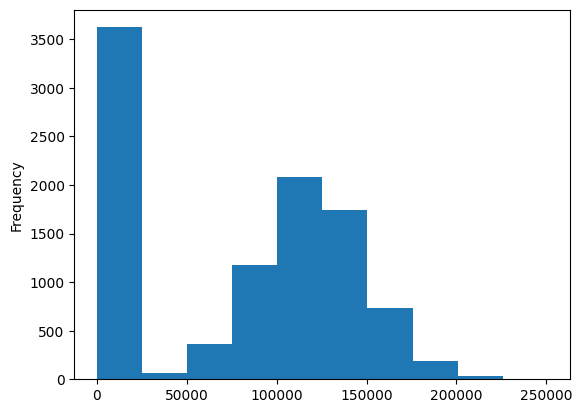

In [ ]:
df1['Balance'].plot.hist()

<Axes: >

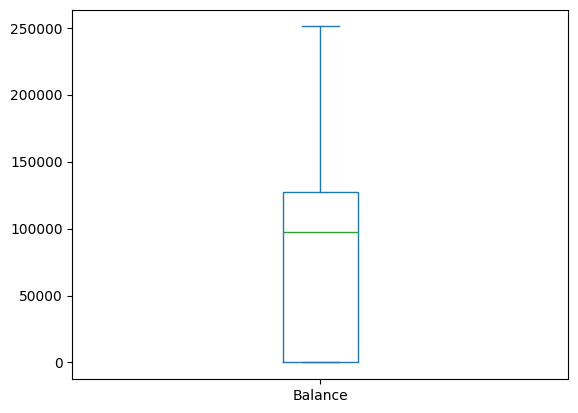

In [ ]:
df1['Balance'].plot.box()

<Axes: xlabel='NumOfProducts'>

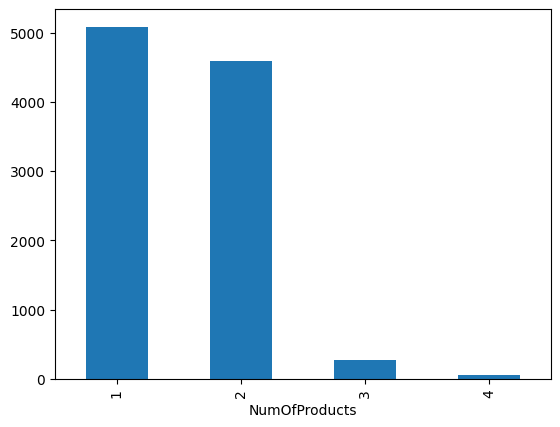

In [ ]:
df1['NumOfProducts'].value_counts().plot.bar()

<Axes: xlabel='HasCrCard'>

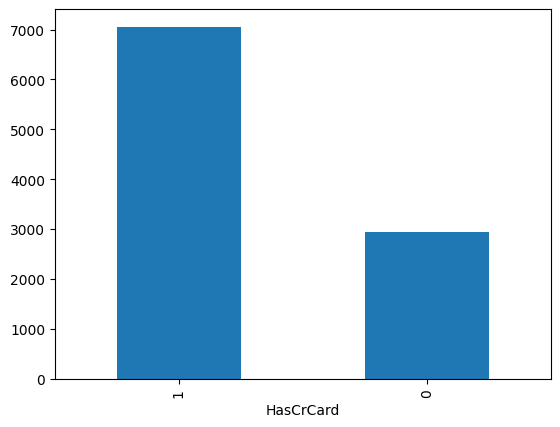

In [ ]:
df1['HasCrCard'].value_counts().plot.bar()

<Axes: xlabel='IsActiveMember'>

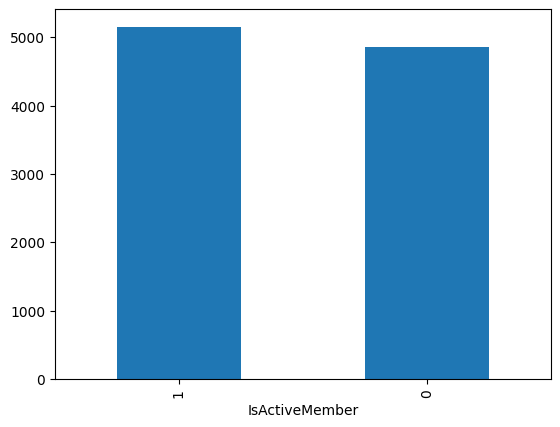

In [ ]:
df1['IsActiveMember'].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

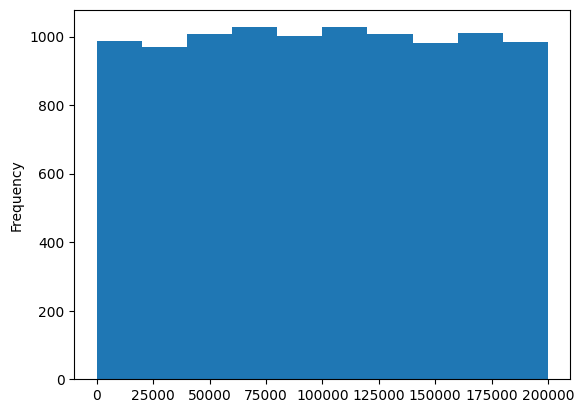

In [ ]:
df1['EstimatedSalary'].plot.hist()

In [ ]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
#how 'Geography' is affecting 'Exited'
pd.crosstab(df1['Geography'] , df1['Exited'])

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Geography'>

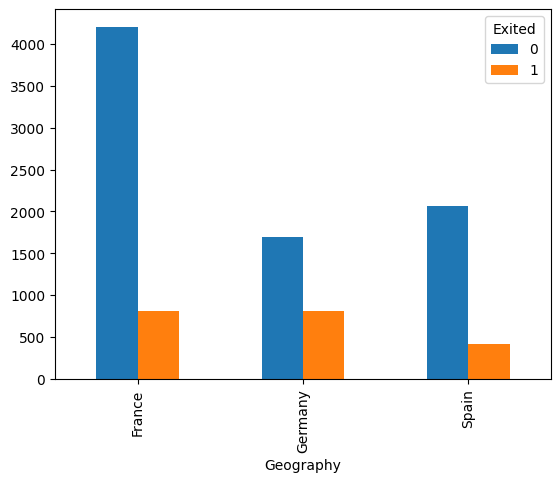

In [ ]:
pd.crosstab(df1['Geography'] , df1['Exited']).plot.bar()

In [ ]:
#how 'Gender' is affecting 'Exited'
pd.crosstab(df1['Gender'] , df1['Exited'])

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


<Axes: xlabel='Gender'>

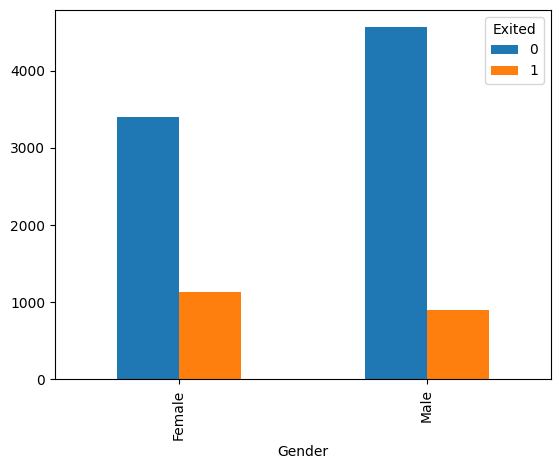

In [ ]:
pd.crosstab(df1['Gender'] , df1['Exited']).plot.bar()

<Axes: xlabel='Tenure'>

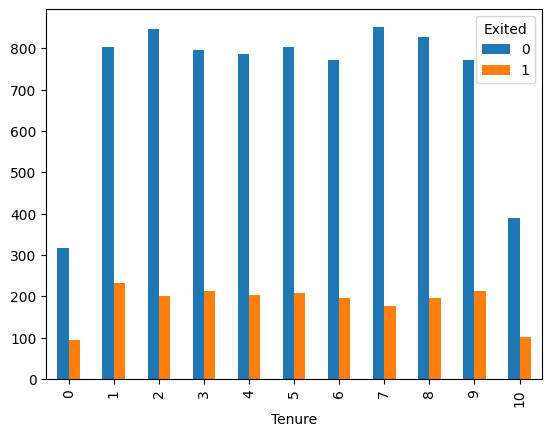

In [ ]:
#how 'Tenure' is affecting 'Exited'
pd.crosstab(df1['Tenure'] , df1['Exited']).plot.bar()

<Axes: xlabel='NumOfProducts'>

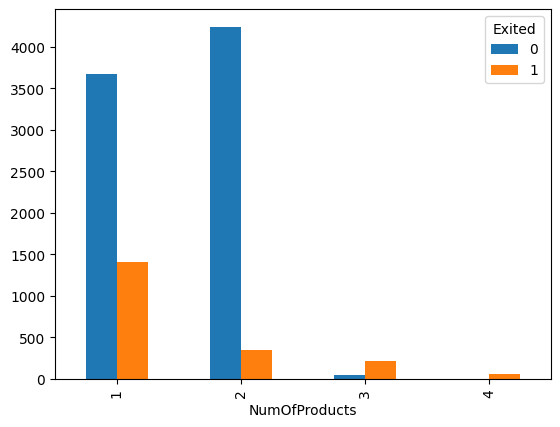

In [ ]:
#how 'NumOfProducts' is affecting 'Exited'
pd.crosstab(df1['NumOfProducts'] , df1['Exited']).plot.bar()

<Axes: xlabel='HasCrCard'>

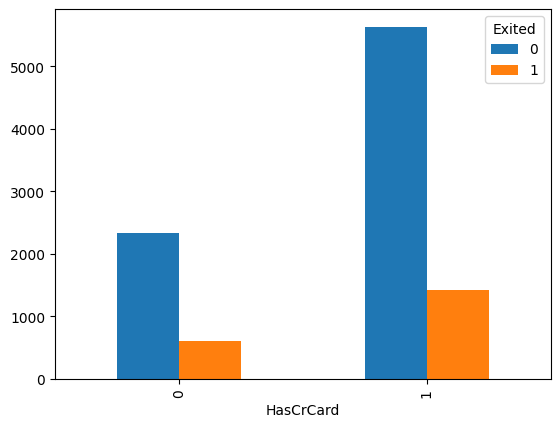

In [ ]:
#how 'HasCrCard' is affecting 'Exited'
pd.crosstab(df1['HasCrCard'] , df1['Exited']).plot.bar()

<Axes: xlabel='IsActiveMember'>

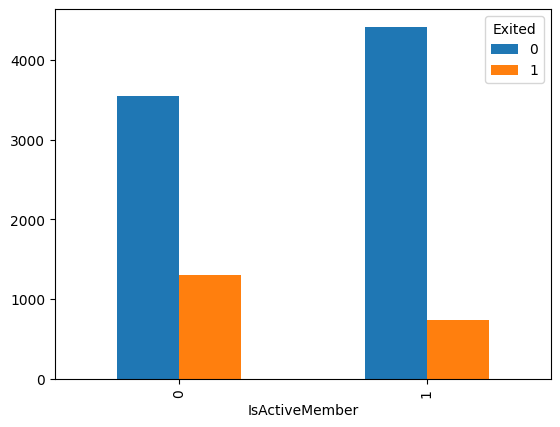

In [ ]:
#how 'IsActiveMember 	' is affecting 'Exited'
pd.crosstab(df1['IsActiveMember'] , df1['Exited']).plot.bar()

In [ ]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
#CreditScore vs Exited
df1.groupby('Exited')['CreditScore'].agg(['mean'])

,mean
Exited,
0,651.853196
1,645.351497


In [ ]:
#Age vs Exited
df1.groupby('Exited')['Age'].agg(['mean'])

,mean
Exited,
0,37.408389
1,44.837997


In [ ]:
#Balance vs Exited
df1.groupby('Exited')['Balance'].agg(['mean'])

,mean
Exited,
0,72745.296779
1,91108.539337


In [ ]:
#EstimatedSalary vs Exited
df1.groupby('Exited')['EstimatedSalary'].agg(['mean'])

,mean
Exited,
0,99738.391772
1,101465.677531


In [ ]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df1.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
#df1['Geography'] = df1['Geography'].astype('category')
#df1['Gender'] = df1['Gender'].astype('category')

In [ ]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Label Encoding foe gender
df1['Gender']=df1['Gender'].map({"Female":0 , "Male":1})

In [ ]:
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
#one hot encoding for Geography
df2 = pd.get_dummies(df1, columns=['Geography'] , dtype = int)

In [ ]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
Xscaled = scaler.transform(X)

In [ ]:
#split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xscaled,y)

In [ ]:
#build model
from sklearn.neighbors import KNeighborsClassifier
modelA = KNeighborsClassifier()
modelA.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
#evaluate model performance - model accuracy
print("Model accuracy on training data -",modelA.score(xtrain,ytrain))
print("Model accuracy on test data -",modelA.score(xtest,ytest))

Model accuracy on training data - 0.8633333333333333
Model accuracy on test data - 0.8084


**Handling and working with biased data**

In [ ]:
#predicted values on data used for training
ytrainP = modelA.predict(xtrain)
ytestP = modelA.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(ytrain , ytrainP))

[[5786  197]
 [ 828  689]]


In [ ]:
print(classification_report(ytrain , ytrainP))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      5983
           1       0.78      0.45      0.57      1517

    accuracy                           0.86      7500
   macro avg       0.83      0.71      0.75      7500
weighted avg       0.86      0.86      0.85      7500



In [ ]:
print(confusion_matrix(ytest , ytestP))

[[1857  123]
 [ 356  164]]


In [ ]:
print(classification_report(ytest , ytestP))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1980
           1       0.57      0.32      0.41       520

    accuracy                           0.81      2500
   macro avg       0.71      0.63      0.65      2500
weighted avg       0.78      0.81      0.79      2500



**Undersampling to fix biasness of the model**

In [ ]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

Xu,yu = rus.fit_resample(X,y)

In [ ]:
yu.value_counts()

,count
Exited,
0,2037
1,2037


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)
Xscaled = scaler.transform(Xu)

xtrain, xtest, ytrain, ytest = train_test_split(Xscaled,yu,stratify=yu)

In [ ]:
ytrain.value_counts()

,count
Exited,
1,1528
0,1527


In [ ]:
ytest.value_counts()

,count
Exited,
0,510
1,509


In [ ]:
modelB = KNeighborsClassifier()
modelB.fit(xtrain,ytrain)

#evaluate model performance - model accuracy
print("Model accuracy on training data -",modelB.score(xtrain,ytrain))
print("Model accuracy on test data -",modelB.score(xtest,ytest))

Model accuracy on training data - 0.7901800327332242
Model accuracy on test data - 0.6957801766437685


In [ ]:
print(classification_report(ytrain, modelB.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1527
           1       0.79      0.78      0.79      1528

    accuracy                           0.79      3055
   macro avg       0.79      0.79      0.79      3055
weighted avg       0.79      0.79      0.79      3055



In [ ]:
print(classification_report(ytest, modelB.predict(xtest)))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       510
           1       0.71      0.66      0.68       509

    accuracy                           0.70      1019
   macro avg       0.70      0.70      0.70      1019
weighted avg       0.70      0.70      0.70      1019



**Handling biasness using oversampling**

In [ ]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
#from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE          #Synthetic minority oversampling technique estimation
ros = SMOTE()

Xo,yo = ros.fit_resample(X,y)

In [ ]:
yo.value_counts()

,count
Exited,
1,7963
0,7963


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)
Xscaled = scaler.transform(Xo)

xtrain, xtest, ytrain, ytest = train_test_split(Xscaled,yo,stratify=yo)

In [ ]:
print(ytrain.value_counts())
print(ytest.value_counts())

Exited
0    5972
1    5972
Name: count, dtype: int64
Exited
0    1991
1    1991
Name: count, dtype: int64


In [ ]:
modelC = KNeighborsClassifier()
modelC.fit(xtrain,ytrain)

#evaluate model performance - model accuracy
print("Model accuracy on training data -",modelC.score(xtrain,ytrain))
print("Model accuracy on test data -",modelC.score(xtest,ytest))

Model accuracy on training data - 0.8899028801071668
Model accuracy on test data - 0.8372677046710196


In [ ]:
print(classification_report(ytrain, modelC.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5972
           1       0.90      0.88      0.89      5972

    accuracy                           0.89     11944
   macro avg       0.89      0.89      0.89     11944
weighted avg       0.89      0.89      0.89     11944



In [ ]:
print(classification_report(ytest, modelC.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1991
           1       0.84      0.83      0.84      1991

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



**Logistic Regression**

In [ ]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)
Xscaled = scaler.transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(Xscaled,y,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_A = LogisticRegression()

model_log_A.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
#evaluate model performance - model accuracy
print("Model accuracy on training data -",model_log_A.score(xtrain,ytrain))
print("Model accuracy on test data -",model_log_A.score(xtest,ytest))

Model accuracy on training data - 0.8101333333333334
Model accuracy on test data - 0.8228


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytrain, model_log_A.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5972
           1       0.61      0.19      0.29      1528

    accuracy                           0.81      7500
   macro avg       0.72      0.58      0.59      7500
weighted avg       0.78      0.81      0.77      7500



In [ ]:
print(classification_report(ytest, model_log_A.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1991
           1       0.73      0.21      0.32       509

    accuracy                           0.82      2500
   macro avg       0.78      0.59      0.61      2500
weighted avg       0.81      0.82      0.78      2500



**Evaluate the model performance after oversampling**

In [ ]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()

Xo,yo = ros.fit_resample(X,y)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(Xo)
Xscaled = scaler.transform(Xo)

xtrain, xtest, ytrain, ytest = train_test_split(Xscaled,yo,stratify=yo)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_B = LogisticRegression()

model_log_B.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
#evaluate model performance - model accuracy
print("Model accuracy on training data -",model_log_B.score(xtrain,ytrain))
print("Model accuracy on test data -",model_log_B.score(xtest,ytest))

Model accuracy on training data - 0.8220864032150034
Model accuracy on test data - 0.8211953792064289


In [ ]:
print(classification_report(ytrain, model_log_B.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      5972
           1       0.85      0.79      0.82      5972

    accuracy                           0.82     11944
   macro avg       0.82      0.82      0.82     11944
weighted avg       0.82      0.82      0.82     11944



In [ ]:
print(classification_report(ytest, model_log_B.predict(xtest)))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1991
           1       0.86      0.77      0.81      1991

    accuracy                           0.82      3982
   macro avg       0.82      0.82      0.82      3982
weighted avg       0.82      0.82      0.82      3982



**Handling Biasness using Class weight management**

In [ ]:
x = 1
w0 = 1e-2
w1 = 1e-2

z = 1/(1 + np.exp(-(w0 + w1*x)))
print(z)

0.5049998333399998


In [ ]:
x = 2
w0 = 4 * 1e-2
w1 = 4 * 1e-2

z = 1/(1 + np.exp(-(w0 + w1*x)))
print(z)

0.5299640517645717


In [ ]:
X = df2.drop(columns = ['Exited'])
y = df2['Exited']

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X)
Xscaled = scaler.transform(X)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(Xscaled,y,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_D = LogisticRegression(class_weight={0:1 , 1:6})

model_log_D.fit(xtrain,ytrain)

LogisticRegression(class_weight={0: 1, 1: 6})

In [ ]:
#evaluate model performance - model accuracy
print("Model accuracy on training data -",model_log_D.score(xtrain,ytrain))
print("Model accuracy on test data -",model_log_D.score(xtest,ytest))

Model accuracy on training data - 0.6134666666666667
Model accuracy on test data - 0.5948


In [ ]:
print(classification_report(ytrain, model_log_D.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.93      0.56      0.70      5972
           1       0.32      0.83      0.47      1528

    accuracy                           0.61      7500
   macro avg       0.63      0.69      0.58      7500
weighted avg       0.81      0.61      0.65      7500



In [ ]:
print(classification_report(ytest, model_log_D.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.53      0.68      1991
           1       0.31      0.83      0.46       509

    accuracy                           0.59      2500
   macro avg       0.62      0.68      0.57      2500
weighted avg       0.80      0.59      0.63      2500



In [ ]:
print(model_log_D.coef_)

[[-0.53290294 -0.53568928  5.78743325 -0.15348362  0.79668666 -0.19437885
  -0.03502771 -0.86039434  0.04143567 -0.3667887   0.33776752 -0.35169777]]
